# Project: Wrangling and Analyze Data

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import tweepy
import json
import os
from IPython.core.interactiveshell import InteractiveShell #enabling to  printing multple outputs on one cell
InteractiveShell.ast_node_interactivity 
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)    


# Save HTML to file

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
image_predictions=pd.read_table('image_predictions.tsv') 


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

# Tweet Jason.txt 

In [4]:
df_1=pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "HIDDEN"#'SELv1u3XHI61DTfbVKhenzTtn'
consumer_secret ="HIDDEN"#'ZZzRWpcPHcKnN3ij7AabErIFiZBcUFlE4y3PS6sdE5dLlXdnO8'
access_token = "HIDDEN"#'899565025257566208-stpQvk4Gde7ZMXueJRhuzvIdx5UjjMJ'
access_secret = "HIDDEN"#'XwSN4IwE2QGZ80eqwpo6EbAwfgkn8ylTXvmyi2ETV5tTD'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_jason.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df_list = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        jsonobj=json.loads(line)
        twee_id=jsonobj["id"]
        retweet_count=jsonobj["retweet_count"]
        favourite_count=jsonobj["favorite_count"]
        
        
    # Do something with 'line'
        df_list.append({'tweet_id': twee_id,'retweet_count':retweet_count,'favourite_count':favourite_count,
                       })
tweet_jason= pd.DataFrame(df_list, columns = ['tweet_id','retweet_count','favourite_count'])                       

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Investigating quality issues

The first quality issue of wrong formatting was found programmatically using  info method


In [6]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The second quality issue was found programmatically by looking at the name in Twitter_archive_df dataframe. Some records contains some invalid records example "a"

In [7]:
twitter_archive_enhanced.name.values

array(['Phineas', 'Tilly', 'Archie', ..., 'a', 'a', 'None'], dtype=object)

The third quality issue was investigated pragrammatically by looking at  non null values in the retweeted_status_id column One of the project motivation is to analyze only the original tweets instead of retweets. The code below is used to find and count  the retweets rows is shown below

In [8]:
twitter_archive_enhanced.retweeted_status_id.notnull().sum()

twitter_archive_enhanced[pd.notnull(twitter_archive_enhanced['retweeted_status_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


The fourth quality issue was investigated programmatically  by finding the percentages of missing values in each column as shown below.

In [9]:
twitter_archive_enhanced_copy=twitter_archive_enhanced.copy()
thres = 50

for column in twitter_archive_enhanced_copy.columns:
    if (twitter_archive_enhanced_copy[column].isna().sum())/len(twitter_archive_enhanced_copy)*100 > thres:
        twitter_archive_enhanced_copy.drop(column,axis=1,inplace=True)
        print("successfully removed {}".format(column))

successfully removed in_reply_to_status_id
successfully removed in_reply_to_user_id
successfully removed retweeted_status_id
successfully removed retweeted_status_user_id
successfully removed retweeted_status_timestamp


The fifth quality issue was found using the info method. The time stamp column  was in object format instead of a date time format as shown on the code below.


In [10]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The sixth quality issue was found using investigated visually. it was found that each value in the columns contains either of these three phases:Iphone, Twitter Web Client and TweetDeck 

In [11]:
twitter_archive_enhanced.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

The seventh quality issue was found by assessing the image predictions dataframe visually. it can be observed that the first image predictions is much more accurate than the second or the third predictions based on p2_conf column

In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The eighth quality issue was found programmatically using info method on the expanded_urls column as shown below. There are 2356 row but the non-null entries are 2297. 

In [13]:
twitter_archive_enhanced.expanded_urls.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: expanded_urls
Non-Null Count  Dtype 
--------------  ----- 
2297 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


#### The ninth quality isssue was found programmatically by checking the rating in the values in the rating_numerator column which were integer values but some values in the text were decimal. This indicates that some ratings were extracted wrongly originally

In [14]:
twitter_archive_enhanced_copy[twitter_archive_enhanced_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


C:\Users\marsh\AppData\Local\Temp\ipykernel_18044\413619156.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_enhanced_copy[twitter_archive_enhanced_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


##### Investigating the Tidiness issues

The first tideness issue was assessed visually by looking at the structure of dog stages columns. It would make more sense if all dog stages were condensed into one column instead of 4 different columns

In [15]:
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
twitter_archive_enhanced.loc[:,'doggo':]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2351,None,None,None,None
2352,None,None,None,None
2353,None,None,None,None
2354,None,None,None,None


The second tidiness issue was investigated by analyzing the overall structure of the dataset. it would be easier to merge  all three datasets into one dataframe so that it will be easier for analysis and visualization purposes.

### Summary  of quality issues
1. ID Columns in the three dataframes are in int format instead of string

2. Name column in Twitter_archive_df dataframe contains some invalid records example "a"
3.  Some rows were retweets and need to be cleaned so that only original ratings are analyzed
4. Columns with high amount of null in Twitter_archive_df dataframe which will be categorize as low level information columns

5. Time stamp  column is in object format instead of a date time object

6.  The Source columns needs to cleaned to present a more presentable values

7. The second and thirdly likely predictions need to be dropped

8. Misssing expanded_urls  in  tweet enhanced data frame ought to be populated with a string representing missing
9. Extracting Ratings correctly

### Summary of tidiness issues
1.  For the dog stages each Variable does not form a column, as the various dog stages can be populated in one column call dog stage

2. Merging  to  have only one data frame with rating and images 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
tweet_jason_copy=tweet_jason.copy()
image_predictions_copy=image_predictions.copy()
twitter_archive_enhanced_copy=twitter_archive_enhanced.copy()

In [18]:
tweet_jason_copy

,tweet_id,retweet_count,favourite_count
0,892420643555336193,6867,32867
1,892177421306343426,5172,28389
2,891815181378084864,3414,21335
3,891689557279858688,7077,35818
4,891327558926688256,7580,34258
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,243
2322,666033412701032449,35,98
2323,666029285002620928,39,111


### Issue #1:  ID Columns in the three dataframes are in int format instead of string

#### Define: Change the int format of id columns in three datasets  to string format

#### Code

In [19]:
twitter_archive_enhanced_copy['tweet_id'] = twitter_archive_enhanced_copy['tweet_id'].astype('str')
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype('str')
tweet_jason_copy['tweet_id'] = tweet_jason_copy['tweet_id'].astype('str')

#### Test

In [20]:
assert  twitter_archive_enhanced_copy['tweet_id'].dtype == 'O'
assert  image_predictions_copy['tweet_id'].dtype == 'O'
assert  tweet_jason_copy['tweet_id'].dtype == 'O'

### Issue #2:  Name column in Twitter_archive_df dataframe    contains some invalid names example "a"

#### Define: Invalid names  thus names which does not make sense are going to be changed to unknown names
#### A list of invalid names is going to be created and then all the names in this list are going to be renamed to unknown.

#### Code

In [21]:
lowercase_names= twitter_archive_enhanced_copy[twitter_archive_enhanced_copy['name'].str.match('^[a-z]')].name.values

In [22]:
incorrect_names = ['Al','Ed','an','by','my','all','his',
                   'mad','not','old','one','the','all',
                   'the','Stu','this','just','such','very',
                   'quite','getting','actually','officially',
                   'incredibly','infuriating','unacceptable','None','a','O']
incorrectnames=incorrect_names + list(lowercase_names)

In [23]:
for index,row in twitter_archive_enhanced_copy.iterrows():
    if str(twitter_archive_enhanced_copy.name[index]) in incorrectnames:
        twitter_archive_enhanced_copy.name[index]= 'Unknown'
    else:
        pass

C:\Users\marsh\AppData\Local\Temp\ipykernel_18044\3699703039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_copy.name[index]= 'Unknown'


#### Test

In [24]:
assert 'Al' not in twitter_archive_enhanced_copy['name'].values
assert twitter_archive_enhanced_copy[twitter_archive_enhanced_copy['name'].str.islower()].shape[0]==0

### Issue #3 : Some rows were retweets and need to be cleaned so that only original ratings are analyzed



#### Define: remove retweeted rows

#### code:

In [25]:
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[pd.isnull(twitter_archive_enhanced_copy.retweeted_status_id)]
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[pd.isnull(twitter_archive_enhanced_copy.in_reply_to_status_id)]


#### Test

In [26]:
assert twitter_archive_enhanced_copy.retweeted_status_id.notnull().sum() ==0

### Issue #4 : Columns with high amount of null in Twitter_archive_df dataframe which will be categorize as low level information columns

#### Define: Dropping all columns with high amount of  null values . The threshold vlaues is set 50%. all columns in Twitter_archive_df with greater than 50%  of null values must be dropped 

#### Code

In [27]:
thres = 50

for column in twitter_archive_enhanced_copy.columns:
    if (twitter_archive_enhanced_copy[column].isna().sum())/len(twitter_archive_enhanced_copy)*100 > thres:
        twitter_archive_enhanced_copy.drop(column,axis=1,inplace=True)
        print("successfully removed {}".format(column))

successfully removed in_reply_to_status_id
successfully removed in_reply_to_user_id
successfully removed retweeted_status_id
successfully removed retweeted_status_user_id
successfully removed retweeted_status_timestamp


#### Test

In [28]:
assert 'in_reply_to_status_id' not in twitter_archive_enhanced_copy.columns
assert 'in_reply_to_user_id' not in twitter_archive_enhanced_copy.columns
assert 'retweeted_status_id' not in twitter_archive_enhanced_copy.columns
assert 'removed retweeted_status_user_id' not in twitter_archive_enhanced_copy.columns
assert 'removed retweeted_status_timestamp' not in twitter_archive_enhanced_copy.columns


### Issue #5 : Time stamp  column is in object format instead of a date time object

#### Define:  time stamp columns in twitter_archive_df is going to be converted date format

#### Code

In [29]:
twitter_archive_enhanced_copy['timestamp'] = pd.to_datetime(twitter_archive_enhanced_copy['timestamp'])

#### Test

In [30]:
assert twitter_archive_enhanced_copy['timestamp'].dtype == 'datetime64[ns, UTC]'

### Issue #6: The Source columns needs to cleaned to present a more presentable values

#### Define:  The source column is trimmed to contain either of these three value  Twitter for Iphone, Twitter Web Client, Vine, and TweetDeck 

#### Code

In [31]:
source_tag = []

for x in twitter_archive_enhanced_copy.source.values:
    if x == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        source_tag.append('Twitter for Iphone')
    elif x == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        source_tag.append('Twitter Web Client')
    elif x == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        source_tag.append('Vine')
    else:
        source_tag.append('TweetDeck')
        
twitter_archive_enhanced_copy.source = source_tag

#### Test

In [32]:
twitter_archive_enhanced_copy.source.unique()

array(['Twitter for Iphone', 'Twitter Web Client', 'Vine', 'TweetDeck'],
      dtype=object)

### Issue #7: The second and thirdly likely predictions  in the image predictions need to be dropped

#### Define; Dropping the the second and third predictions in the image_predictions data frame

#### code

In [33]:
image_predictions_copy_new=image_predictions_copy.iloc[:, 0:6]


#### Test

In [34]:
assert 'tweet_id' in image_predictions_copy_new
assert 'jpg_url' in image_predictions_copy_new
assert 'img_num' in image_predictions_copy_new
assert 'p1' in image_predictions_copy_new
assert 'p1_conf' in image_predictions_copy_new
assert 'p1_dog' in image_predictions_copy_new

### Issue #8 :Misssing expanded_urls  in  tweet enhanced data frame ought to be populated with a string representing missing

#### Define: Find all NA values in the expanded_urs in twitter enhanced data frame and populate with the string missing 

#### code:

In [35]:
twitter_archive_enhanced_copy.expanded_urls.fillna("missing", inplace = True)

#### Test


In [36]:
twitter_archive_enhanced_copy.expanded_urls.isnull().sum()

0

### Issue#9: Extracting Ratings correctly

#### Define: Numerators in twitter_enhanced datasets were not extracted correctly. Decimal places were not extraced correctly from the text. In this cleaning process rows with decimal ratings are extracted from the text and the numerator rating value in the rating_numerator column is replaced with the correct decimal value

#### Code

In [37]:


x=twitter_archive_enhanced_copy[twitter_archive_enhanced_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
x['numbers'] = x['text'].str.extract(r'([+-]?\d+\.\d+)')
index_numbers = x.index.tolist()


twitter_archive_enhanced_copy.loc[x.index,['rating_numerator']]=x['numbers'].tolist()
twitter_archive_enhanced_copy['rating_numerator']=twitter_archive_enhanced_copy['rating_numerator'].astype(float)

C:\Users\marsh\AppData\Local\Temp\ipykernel_18044\1013387526.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  x=twitter_archive_enhanced_copy[twitter_archive_enhanced_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


#### Test

In [38]:
twitter_archive_enhanced_copy.loc[index_numbers,['text','rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


### Tidiness issues

### Issue #1:  For the dog stages each Variable does not form a column, as the various dog stages can be populated in one column call dog stage

#### Define: All the dog stages  in twitter_enhanced data frame are going to be condensed into one column column called dog_stages
First replace all None to NaN for easier concatenation
#### previous dog stages columns are going to be dropped

#### code:

In [39]:
# merge different dog types into a column dog_class
twitter_archive_enhanced_copy['dog_class'] = twitter_archive_enhanced_copy[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
twitter_archive_enhanced_copy['dog_class'] = twitter_archive_enhanced_copy['dog_class'].str.replace(r'(None,)', repl='')
twitter_archive_enhanced_copy.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)
twitter_archive_enhanced_copy.dog_class.replace({"pupper,None":"pupper","puppo,None":"puppo","floofer,None":"floofer"}, inplace=True)


C:\Users\marsh\AppData\Local\Temp\ipykernel_18044\1322575290.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_enhanced_copy['dog_class'] = twitter_archive_enhanced_copy['dog_class'].str.replace(r'(None,)', repl='')


#### Test

In [40]:
twitter_archive_enhanced_copy.dog_class.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'puppo,doggo',
       'floofer,doggo', 'pupper,doggo'], dtype=object)

### Issue #2: Merging  to  have only one data frame with rating and images 

#### Define: Merge all three data sets into one based on tweet_id column

#### code:

In [41]:
df_0=pd.merge(twitter_archive_enhanced_copy, tweet_jason_copy, on='tweet_id')

In [42]:
df=pd.merge(df_0,image_predictions_copy, on='tweet_id')

#### Test

In [43]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_class',
       'retweet_count', 'favourite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [44]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

##### In this section the distribution of likes and retweets for each dog class  was analyzed

In [45]:


# number of likes for each type of dog stages.

doggo_likes= df.loc[df['dog_class'] == 'doggo', 'favourite_count'].sum()
puppo_likes= df.loc[df['dog_class'] == 'puppo', 'favourite_count'].sum()
floofer_likes= df.loc[df['dog_class'] == 'floofer', 'favourite_count'].sum()
pupper_likes= df.loc[df['dog_class'] == 'pupper', 'favourite_count'].sum()


puppo_doggo_likes= df.loc[df['dog_class'] == 'puppo,doggo', 'favourite_count'].sum()
floofer_doggo_likes= df.loc[df['dog_class'] == 'floofer,doggo', 'favourite_count'].sum()
pupper_doggo_likes= df.loc[df['dog_class'] == 'pupper,doggo', 'favourite_count'].sum()

None_likes=df.loc[df['dog_class'] == 'None', 'favourite_count'].sum()



# number of retweets for each type of dog stages.

doggo_retweets= df.loc[df['dog_class'] == 'doggo', 'retweet_count'].sum()
puppo_retweets= df.loc[df['dog_class'] == 'puppo', 'retweet_count'].sum()
floofer_retweets= df.loc[df['dog_class'] == 'floofer', 'retweet_count'].sum()
pupper_retweets= df.loc[df['dog_class'] == 'pupper', 'retweet_count'].sum()


puppo_doggo_retweets= df.loc[df['dog_class'] == 'puppo,doggo', 'retweet_count'].sum()
floofer_doggo_retweets= df.loc[df['dog_class'] == 'floofer,doggo', 'retweet_count'].sum()
pupper_doggo_retweets= df.loc[df['dog_class'] == 'pupper,doggo', 'retweet_count'].sum()

None_retweets=df.loc[df['dog_class'] == 'None', 'retweet_count'].sum()


insight1 = pd.DataFrame(
    {"retweets": [doggo_retweets, puppo_retweets, pupper_retweets,floofer_retweets,puppo_doggo_retweets,floofer_doggo_retweets,
                  pupper_doggo_retweets,None_retweets],
    "Likes": [doggo_likes, puppo_likes, pupper_likes,floofer_likes,puppo_doggo_likes,floofer_doggo_likes,
                  pupper_doggo_likes,None_likes]}, 
    index=["doggo", "puppo", "pupper", "floofer",'puppo_doggo','floofer_doggo','pupper_doggo','None*'])

insight1

,retweets,Likes
doggo,362815,1061377
puppo,114629,417664
pupper,378792,1221958
floofer,27305,76442
puppo_doggo,15641,40287
floofer_doggo,2748,14358
pupper_doggo,29255,98947
None*,3408857,11867767


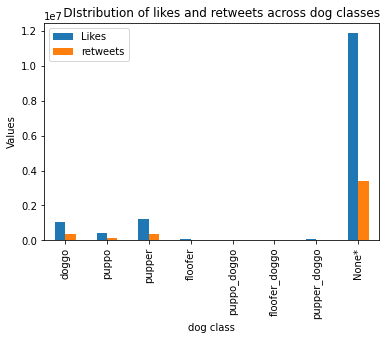

<Figure size 432x288 with 0 Axes>

In [54]:
# Plot the bar graph
ax = insight1.plot.bar( y=['Likes', 'retweets'])

# Add x and y labels
ax.set_xlabel('dog class')
ax.set_ylabel('Values')
ax.set_title('     DIstribution of likes and retweets across dog classes')

# Show the plot
plt.show()
plt.savefig("Distribution of likes and retweets.jpg",bbox_inches='tight')

### Insights:
1. the number of likes and retweets were not influenced whether the dog class was included in the tweet.

2. the rating numerator and denominator was not standardize hence the rating depended on the user rating the dog. Some ratings have denominators above 100 whilst some have ratings of ten.
3. Most of the tweets in the data set did not contain dog class
4. Most of the dog rating tweets were tweeted using mobile device Iphone

### Visualization

###### Distribution of dog class column

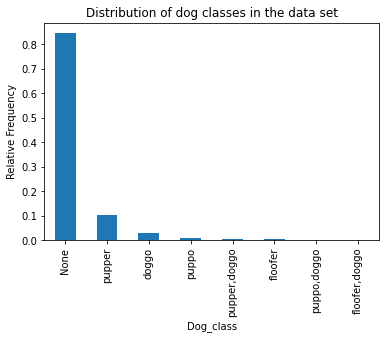

<Figure size 432x288 with 0 Axes>

In [56]:
freq=df['dog_class'].value_counts()
# Convert the frequencies to relative frequencies
rel_freq = freq.div(freq.sum())

# Plot the bar graph of relative frequencies
rel_freq.plot.bar()

# Add labels and show the plot
plt.xlabel('Dog_class')
plt.ylabel('Relative Frequency')
plt.title('Distribution of dog classes in the data set')
plt.show()
plt.savefig("Dog class distribution.jpg",bbox_inches='tight')

##### Distribution of sources 

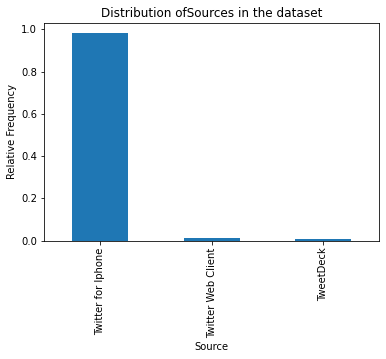

<Figure size 432x288 with 0 Axes>

In [55]:

freq=df.source.value_counts()
# Convert the frequencies to relative frequencies
rel_freq = freq.div(freq.sum())

# Plot the bar graph of relative frequencies
rel_freq.plot.bar()

# Add labels and show the plot
plt.xlabel('Source')
plt.ylabel('Relative Frequency')
plt.title('Distribution ofSources in the dataset')
plt.show()
plt.savefig("Source distribution.jpg",bbox_inches='tight')